In [1]:
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.info()
df.duplicated().sum()#find duplicate 
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
print(df["Exited"].value_counts())
print(df["Gender"].value_counts())
print(df["Geography"].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [6]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [7]:
X=df.drop(columns=["Exited"])
y=df["Exited"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=2,random_state=1)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

X_train_scaled,X_test_scaled

(array([[-1.23676019,  0.29353011, -1.04191108, ..., -0.57881318,
         -0.57388544, -1.09578666],
        [ 0.61523625, -0.46925336,  1.03271175, ...,  1.72767315,
         -0.57388544,  0.9125864 ],
        [-1.11260401, -0.85064509,  0.3411708 , ...,  1.72767315,
         -0.57388544,  0.9125864 ],
        ...,
        [ 0.22207499,  0.57957391,  1.37848222, ..., -0.57881318,
         -0.57388544, -1.09578666],
        [ 0.12895785,  0.00748631,  1.03271175, ..., -0.57881318,
         -0.57388544, -1.09578666],
        [ 1.16359273,  0.29353011,  0.3411708 , ...,  1.72767315,
         -0.57388544,  0.9125864 ]]),
 array([[-1.,  1., -1., -1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 1., -1.,  1.,  1., -1.,  0., -1., -1.,  0.,  0.,  0.]]))

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model=Sequential()
#input dimention=11
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',optimizer='Adam')
model.fit(X_train_scaled,y_train,epochs=20)


Epoch 1/20

313/313 [==============================] - 3s 2ms/step - loss: 0.6328
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.5027
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.4622
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4465
Epoch 5/20
313/313 [==============================] - 0s 2ms/step - loss: 0.4377
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.4321
Epoch 7/20
313/313 [==============================] - 0s 2ms/step - loss: 0.4282
Epoch 8/20
313/313 [==============================] - 0s 2ms/step - loss: 0.4254
Epoch 9/20
313/313 [==============================] - 0s 1ms/step - loss: 0.4233
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4216
Epoch 11/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4202
Epoch 12/20
313/313 [==============================] - 0s 2ms/step - loss: 0.4188
Epoch 13/20
313/313 [==

In [11]:
model.layers[0].get_weights()
model.layers[1].get_weights()

[array([[ 1.2085758],
        [-1.518504 ],
        [-1.6219163]], dtype=float32),
 array([-0.36308625], dtype=float32)]

In [12]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 80ms/step


array([[0.22816594],
       [0.11790154]], dtype=float32)

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8368 - val_loss: 0.4014 - val_accuracy: 0.8305
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3996 - accuracy: 0.8380 - val_loss: 0.4013 - val_accuracy: 0.8295
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8375 - val_loss: 0.4012 - val_accuracy: 0.8300
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8376 - val_loss: 0.4012 - val_accuracy: 0.8300
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8368 - val_loss: 0.4013 - val_accuracy: 0.8290
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8371 - val_loss: 0.4013 - val_accuracy: 0.8300
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8380 - val_loss: 0.4012 - val_accuracy: 0.8295

In [20]:
import matplotlib.pyplot as plt
history.history

{'loss': [0.39980217814445496,
  0.3996047377586365,
  0.39960119128227234,
  0.3996058404445648,
  0.39952564239501953,
  0.3994472622871399,
  0.3993877172470093,
  0.39935094118118286,
  0.3993401825428009,
  0.39930155873298645,
  0.3992345929145813,
  0.39918893575668335,
  0.39913010597229004,
  0.39909690618515015,
  0.39903005957603455,
  0.3989780843257904,
  0.3990209400653839,
  0.39897873997688293,
  0.3989253640174866,
  0.398868203163147,
  0.3987959921360016,
  0.3987520635128021,
  0.3987453281879425,
  0.39875176548957825,
  0.39863693714141846,
  0.39863553643226624,
  0.3986159861087799,
  0.3986324965953827,
  0.3984823226928711,
  0.39850348234176636,
  0.3984478712081909,
  0.39846229553222656,
  0.39837777614593506,
  0.39831095933914185,
  0.3983202576637268,
  0.3983899652957916,
  0.3982243537902832,
  0.3982357680797577,
  0.3982203006744385,
  0.39812514185905457,
  0.3980572521686554,
  0.398091197013855,
  0.3980535864830017,
  0.3980282247066498,
  0.3979

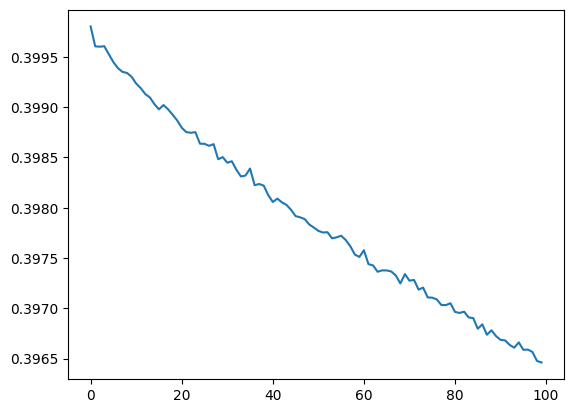

In [22]:
plt.plot(history.history['loss'])